In [45]:
"""
参考: https://www.kaggle.com/wakamezake/neural-networks-product-classification-otto
"""

import numpy as np
import pandas as pd
from IPython.display import display

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# dataset の読み込み
train_df = pd.read_csv('./data/train.csv')

# テスト用にデータ数を少なくする

train_df = train_df.sample(n=20000)

# 不要なデータの削除
train_df = train_df.drop(['ID'],axis=1)

display(train_df.head())
display(train_df.describe())
print(train_df.shape)

# 特微量の取り出し
columns = train_df.columns[1:]
print(columns)

# 訓練データ
X = train_df[columns]
y = train_df[['target']]

# カテゴリカラムを数値に変更する
from sklearn import preprocessing 
for f in X.columns: 
    if X[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(X[f].values)) 
        X[f] = lbl.transform(list(X[f].values))

display(X.head())

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
25187,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,3.916848,NaN,8.245722,NaN,14.263424,NaN,NaN,NaN,NaN,NaN,NaN,8.193488,YGJ,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN,4.393416,NaN,NaN,NaN,0,NaN,15.695680,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,1.863399,NaN,H,NaN,NaN,NaN,AZ,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,C,1,NaN,B,B,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN,B,NaN,N,NaN,8.940264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,NaN,NaN,NaN,1,NaN,NaN
49725,0,2.825865,6.577360,C,5.116358,8.706349,2.912424,4.144602,1.385509,7.922705,1.312910,14.450402,6.787999,2.830338,12.148604,2.151800,3.148148,4.995224,0.702524,0.180899,16.395621,7.288215,AEK,-2.975980e-07,B,1.365399,2.333673,4.826884,4.197134,6.507129,C,A,1.252545,2.199592,6.630984,5.315681,15.279962,0.737100,0,0.522413,9.536937,5.488798,12.871691,3.351206,12.900823,6.052262,1.522021,G,10.918199,6.619144,0.600103,6.925277,G,14.491394,0.575708,1.344195,DP,5.234216,4.265593,8.699616,2.053631,15.756046,1,1.556873,8.233014,13.927760,B,7.596741,18.350100,8.148149,11.808217,F,1,2.289991,B,D,3.113825,6.079431,14.074074,M,1.642512,7.975447,3.592984,2.321792,1.038697,2.012987,1.008146,10.340520,1.120163,0.634189,0.844925,C,0.206155,6.137845,5.576123,0.253241,4.714867,5.405405,8.336216,1.586897,1.573441e+01,7.100506,2.047954,8.097404,2.297705,0.846749,14.330532,D,1.625292,3.112685,A,3.849286,D,AE,14.265961,11.666666,3.442879,9.136719,6.142507,1.523002e+00,1.146881,3.507692,6.376811,4.182293,1.377853,X,2.234748,3.914206,1.649634,0,1.061426,2.777777
43263,0,1.145834,2.189949,C,1.713692,7.096395,0.945946,1.013514,3.734515,5.551724,1.291028,16.011289,6.545430,4.418399,10.810339,2.003816,4.803922,1.158742,0.824087,0.685940,14.245262,5.940311,YGJ,1.982078e+01,E,3.841368,0.526465,1.525901,7.592473,3.688064,NaN,A,1.359796,4.594595,5.269484,6.959459,15.180575,1.222222,0,0.074225,11.667753,4.791666,10.867118,0.959548,5.538127,16.677464,4.376515,C,17.894271,6.587838,1.229550,13.675419,A,16.824428,2.467520,3.243244,AS,2.894145,19.914237,6.684546,0.412914,7.550922,1,4.323699,2.073609,8.833283,A,5.985361,18.662092,9.411764,11.193605,F,1,3.155379,B,D,0.696516,3.614864,14.705883,E,3.379311,9.868184,2.612931,5.067567,3.310810,7.372354,0.532095,7.646101,0.146396,4.302225,1.399488,F,0.604750,2.050426,5.170463,1.026995,3.102477,4.444445,7.152940,0.175487,-9.206215e-07,2.276132,3.451085,7.959612,3.559757,1.935775,4.698264,A,1.564364,2.643341,B,7.297296,N,NaN,12.809363,10.588236,1.221374,7.405999,5.666666,8.520679e+00,1.269298,7.692307,2.172414,13.627365,1.059518,AK,1.877951,1.921452,1.317061,0,9.066668,0.539217
10047,0,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,0.787746,NaN,6.534844,NaN,10.760797,NaN,NaN,NaN,NaN,NaN,NaN,6.462235,RZS,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,4.905688,NaN,NaN,NaN,0,NaN,11.736488,NaN,NaN,NaN,NaN,NaN,NaN,J,NaN,NaN,0.231825,NaN,H,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,F,1,NaN,B,D,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,A,NaN,D,C,12.313805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BE,NaN,NaN,NaN,0,NaN,NaN
72228,0,0.700758,10.800212,C,5.266391,9.576327,2.727272,2.803030,0.022802,9.122807,1.312910,15.918368,6.586313,3.680840,11.636387,1.748252,5.000000,6.198846,0.151955,0.159729,18.970405,6.774524,CNF,-1.716029e-07,E,0.141336,2.361112,2.234849,1.126791,

,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,20000.00000,1.131100e+04,1.131600e+04,1.131600e+04,11531.000000,1.131100e+04,1.131100e+04,1.153400e+04,1.130800e+04,1.998300e+04,1.131100e+04,19983.000000,1.131100e+04,1.999900e+04,1.131100e+04,1.130300e+04,1.131600e+04,11311.000000,11310.000000,11310.000000,19890.000000,1.114400e+04,11534.000000,1.131100e+04,1.131100e+04,11311.000000,11311.000000,1.131100e+04,1.131100e+04,19978.000000,1.131100e+04,1.153100e+04,1.131000e+04,20000.000000,1.131100e+04,1.997800e+04,1.131100e+04,11311.000000,1.131100e+04,1.131600e+04,1.131100e+04,11534.000000,1.131600e+04,1.131100e+04,1.998300e+04,1.114400e+04,1.131100e+04,11534.000000,1.131100e+04,1.131100e+04,1.131100e+04,1.131600e+04,1.131100e+04,1.131600e+04,20000.000000,11534.000000,1.131600e+04,11310.000000,11311.000000,11311.000000,1.130300e+04,11531.000000,20000.000000,1.131100e+04,1.131600e+04,11311.000000,1.130300e+04,1.130800e+04,11531.000000,1.153100e+04,1.131100e+04,1.131100e+04,1.114400e+04,1.131100e+04,11528.000000,1.131100e+04,11534.000000,11310.000000,11310.000000,11311.000000,1.131100e+04,11310.000000,1.131100e+04,1.131000e+04,1.152700e+04,1.131100e+04,1.131100e+04,1.131600e+04,1.102000e+04,1.131100e+04,1.131100e+04,11531.000000,1.131600e+04,11531.000000,1.153100e+04,1.131100e+04,19994.000000,1.130300e+04,1.131100e+04,1.153100e+04,1.131000e+04,1.114400e+04,1.131100e+04,1.131000e+04,1.130800e+04,11144.000000,1.153400e+04,1.131100e+04,1.131100e+04,11531.000000,20000.000000,1.131000e+04,1.130300e+04
mean,0.75915,1.629888e+00,7.446466e+00,4.129610e+00,8.727802,2.440140e+00,2.478220e+00,1.498797e+00,9.039658e+00,1.885875e+00,1.545112e+01,6.880851,3.806531e+00,1.209429e+01,2.082157e+00,4.915545e+00,3.838380e+00,0.841833,0.221054,17.783228,7.029315,1.121657e+00,1.694518,1.874624e+00,2.731178e+00,5.106623,8.219220,1.626769e+00,2.170414e+00,6.397281,8.139363e+00,1.339659e+01,7.425857e-01,0.091800,1.213672e+00,1.048293e+01,7.197519e+00,12.934970,2.209688e+00,1.080449e+01,9.170493e+00,1.630577,1.253745e+01,8.028424e+00,1.511420e+00,7.221520e+00,1.571590e+01,1.250798,1.566866e+00,4.075040e+00,7.785992e+00,1.059826e+01,1.712924e+00,1.457049e+01,1.035150,1.685254,6.350227e+00,15.850467,9.304560,17.592838,9.444465e+00,12.312523,1.431800,2.436556e+00,2.409717e+00,7.324900,1.335656e+01,2.211844e+00,7.305923,6.168009e+00,2.183130e+00,1.615945e+00,2.848192e+00,1.222672e+00,10.175781,1.913802e+00,1.516365,0.967706,0.585280,5.467969,3.845486e+00,0.669102,6.469771e+00,7.637089e+00,7.617862e+00,1.252953e+00,1.200752e+01,6.850192e+00,2.896804e+00,5.292816e+00,2.647158e+00,1.075240,1.179024e+01,2.152780,4.180253e+00,3.377102e+00,13.560648,1.055283e+01,2.285198e+00,8.308865e+00,8.380374e+00,3.217492e+00,1.284128e+00,2.747052e+00,6.827618e+00,3.577867,9.236192e-01,1.666629e+00,3.217845e+00,2.026753,0.304850,1.935580e+00,1.725100e+00
std,0.42761,1.094446e+00,2.946705e+00,1.146411e+00,2.030773,6.123324e-01,6.031799e-01,2.785363e+00,1.925530e+00,1.396200e+00,7.843269e-01,0.930010,1.150289e+00,1.458232e+00,7.093412e-01,1.780649e+00,1.917506e+00,0.644885,0.094122,1.138142,1.074528,4.056792e+00,2.944052,5.667732e-01,8.415661e-01,2.675781,1.288717,5.524713e-01,9.861848e-01,2.037274,1.319234e+00,2.363890e+00,5.352977e-01,0.589568,2.329223e+00,3.188221e+00,1.002576e+00,0.980049,6.505127e-01,2.121567e+00,2.046322e+00,2.898334,2.209466e+00,8.963356e-01,1.177269e+00,2.519526e+00,7.875605e-01,2.296086,8.348054e-01,6.860126e-01,6.865432e+00,2.079062e+00,5.530415e-01,2.136675e+00,0.695441,2.956988,2.536431e+00,1.877562,1.116450,2.267651,1.900556e+00

(20000, 132)
Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=131)


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
25187,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3.916848,NaN,8.245722,NaN,14.263424,NaN,NaN,NaN,NaN,NaN,NaN,8.193488,7211,NaN,0,NaN,NaN,NaN,NaN,NaN,7,1,NaN,NaN,4.393416,NaN,NaN,NaN,0,NaN,15.695680,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1.863399,NaN,7,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,1,1,NaN,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,13,34,8.940264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,1,NaN,NaN
49725,2.825865,6.577360,2,5.116358,8.706349,2.912424,4.144602,1.385509,7.922705,1.312910,14.450402,6.787999,2.830338,12.148604,2.151800,3.148148,4.995224,0.702524,0.180899,16.395621,7.288215,1021,-2.975980e-07,1,1.365399,2.333673,4.826884,4.197134,6.507129,2,0,1.252545,2.199592,6.630984,5.315681,15.279962,0.737100,0,0.522413,9.536937,5.488798,12.871691,3.351206,12.900823,6.052262,1.522021,6,10.918199,6.619144,0.600103,6.925277,6,14.491394,0.575708,1.344195,75,5.234216,4.265593,8.699616,2.053631,15.756046,1,1.556873,8.233014,13.927760,1,7.596741,18.350100,8.148149,11.808217,3,1,2.289991,1,3,3.113825,6.079431,14.074074,11,1.642512,7.975447,3.592984,2.321792,1.038697,2.012987,1.008146,10.340520,1.120163,0.634189,0.844925,2,0.206155,6.137845,5.576123,0.253241,4.714867,5.405405,8.336216,1.586897,1.573441e+01,7.100506,2.047954,8.097404,2.297705,0.846749,14.330532,3,1.625292,3.112685,0,3.849286,3,4,14.265961,11.666666,3.442879,9.136719,6.142507,1.523002e+00,1.146881,3.507692,6.376811,4.182293,1.377853,86,2.234748,3.914206,1.649634,0,1.061426,2.777777
43263,1.145834,2.189949,2,1.713692,7.096395,0.945946,1.013514,3.734515,5.551724,1.291028,16.011289,6.545430,4.418399,10.810339,2.003816,4.803922,1.158742,0.824087,0.685940,14.245262,5.940311,7211,1.982078e+01,4,3.841368,0.526465,1.525901,7.592473,3.688064,7,0,1.359796,4.594595,5.269484,6.959459,15.180575,1.222222,0,0.074225,11.667753,4.791666,10.867118,0.959548,5.538127,16.677464,4.376515,2,17.894271,6.587838,1.229550,13.675419,0,16.824428,2.467520,3.243244,14,2.894145,19.914237,6.684546,0.412914,7.550922,1,4.323699,2.073609,8.833283,0,5.985361,18.662092,9.411764,11.193605,3,1,3.155379,1,3,0.696516,3.614864,14.705883,4,3.379311,9.868184,2.612931,5.067567,3.310810,7.372354,0.532095,7.646101,0.146396,4.302225,1.399488,5,0.604750,2.050426,5.170463,1.026995,3.102477,4.444445,7.152940,0.175487,-9.206215e-07,2.276132,3.451085,7.959612,3.559757,1.935775,4.698264,0,1.564364,2.643341,1,7.297296,13,34,12.809363,10.588236,1.221374,7.405999,5.666666,8.520679e+00,1.269298,7.692307,2.172414,13.627365,1.059518,11,1.877951,1.921452,1.317061,0,9.066668,0.539217
10047,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.787746,NaN,6.534844,NaN,10.760797,NaN,NaN,NaN,NaN,NaN,NaN,6.462235,5784,NaN,4,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,4.905688,NaN,NaN,NaN,0,NaN,11.736488,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,0.231825,NaN,7,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,3,1,NaN,1,3,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,0,NaN,3,11,12.313805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN,0,NaN,NaN
72228,0.700758,10.800212,2,5.266391,9.576327,2.727272,2.803030,0.022802,9.122807,1.312910,15.918368,6.586313,3.680840,11.636387,1.748252,5.000000,6.198846,0.151955,0.159729,18.970405,6.774524,2375,-1.716029e-07,4,0.141336,2.361112,2.234849,1.126791,10.833333,4,0,1.

In [46]:
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

# 欠損値保管
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(X)
imputed_train = imp.transform(X)

# ダウンサンプリング
positive_count_train = len(y[y.target == 0].values)
rus = RandomUnderSampler(ratio={0:positive_count_train, 1:positive_count_train}, random_state=0)
imputed_train_resampled, y_resampled = rus.fit_sample(imputed_train, y)
print('X_train_resampled.shape: {}, y_train_resampled: {}'.format(imputed_train_resampled.shape, y_resampled.shape))

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(imputed_train_resampled, y_resampled, test_size=0.33, random_state=42)
display("Train Set Shape: {}, Test Set Shape: {}".format(X_train.shape, X_test.shape))

X_train_resampled.shape: (9634, 131), y_train_resampled: (9634, 1)


'Train Set Shape: (6454, 131), Test Set Shape: (3180, 131)'

In [47]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold

params = {"objective": "multi:softprob", "eval_metric":"mlogloss", "num_class": 9}

xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, y_train)

kfold = KFold(n_splits=8)
scores = cross_val_score(estimator=xgb_model, X=X_test, y=y_test, cv=kfold, n_jobs=-1)
print("Cross-Validation scores : {}\n".format(scores))

/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-Validation scores : [0.67839196 0.71356784 0.66834171 0.6080402  0.67254408 0.67506297
 0.63224181 0.68513854]



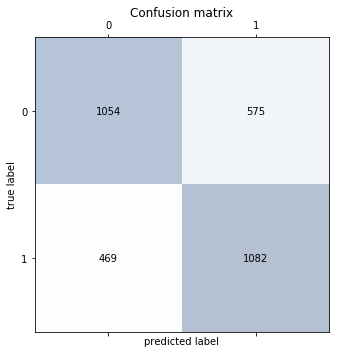

array([1054,  575,  469, 1082])

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(estimator, X, y):
    y_pred = estimator.predict(X)
    confmat = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.title('Confusion matrix')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.tight_layout()
    plt.show()
    return confmat.ravel()

# 混合行列の表示
plot_confusion_matrix(xgb_model, X_test, y_test)


In [25]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, max_depth=7)

feat_selector = BorutaPy(rf, n_estimators='auto', perc = 80, max_iter=500, two_step=False,verbose=2, random_state=42)
# two_stepがない方、つまりBonferroniを用いたほうがうまくいく

# データの二度漬けになるので特徴量選択する際にもtestを含めてはいけない
feat_selector.fit(X_train, y_train)

/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	9 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	10 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	11 / 500
Confirmed: 	0
Tentative: 	130
Rejected: 	0


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	12 / 500
Confirmed: 	18
Tentative: 	43
Rejected: 	69


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	13 / 500
Confirmed: 	18
Tentative: 	43
Rejected: 	69


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	14 / 500
Confirmed: 	18
Tentative: 	43
Rejected: 	69


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	15 / 500
Confirmed: 	18
Tentative: 	43
Rejected: 	69


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	16 / 500
Confirmed: 	18
Tentative: 	29
Rejected: 	83


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	17 / 500
Confirmed: 	18
Tentative: 	29
Rejected: 	83


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	18 / 500
Confirmed: 	18
Tentative: 	29
Rejected: 	83


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	19 / 500
Confirmed: 	18
Tentative: 	23
Rejected: 	89


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	20 / 500
Confirmed: 	18
Tentative: 	23
Rejected: 	89


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	21 / 500
Confirmed: 	18
Tentative: 	23
Rejected: 	89


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	22 / 500
Confirmed: 	18
Tentative: 	23
Rejected: 	89


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	23 / 500
Confirmed: 	18
Tentative: 	20
Rejected: 	92


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	24 / 500
Confirmed: 	18
Tentative: 	20
Rejected: 	92


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	25 / 500
Confirmed: 	18
Tentative: 	20
Rejected: 	92


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	26 / 500
Confirmed: 	18
Tentative: 	19
Rejected: 	93


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	27 / 500
Confirmed: 	18
Tentative: 	19
Rejected: 	93


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	28 / 500
Confirmed: 	18
Tentative: 	19
Rejected: 	93


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	29 / 500
Confirmed: 	18
Tentative: 	17
Rejected: 	95


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	30 / 500
Confirmed: 	18
Tentative: 	17
Rejected: 	95


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	31 / 500
Confirmed: 	18
Tentative: 	17
Rejected: 	95


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	32 / 500
Confirmed: 	18
Tentative: 	16
Rejected: 	96


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	33 / 500
Confirmed: 	18
Tentative: 	16
Rejected: 	96


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	34 / 500
Confirmed: 	18
Tentative: 	16
Rejected: 	96


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	35 / 500
Confirmed: 	18
Tentative: 	16
Rejected: 	96


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	36 / 500
Confirmed: 	18
Tentative: 	16
Rejected: 	96


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	37 / 500
Confirmed: 	18
Tentative: 	16
Rejected: 	96


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	38 / 500
Confirmed: 	18
Tentative: 	16
Rejected: 	96


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	39 / 500
Confirmed: 	18
Tentative: 	16
Rejected: 	96


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	40 / 500
Confirmed: 	18
Tentative: 	14
Rejected: 	98


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	41 / 500
Confirmed: 	18
Tentative: 	14
Rejected: 	98


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	42 / 500
Confirmed: 	18
Tentative: 	14
Rejected: 	98


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	43 / 500
Confirmed: 	18
Tentative: 	14
Rejected: 	98


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	44 / 500
Confirmed: 	18
Tentative: 	14
Rejected: 	98


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	45 / 500
Confirmed: 	18
Tentative: 	14
Rejected: 	98


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	46 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	47 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	48 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	49 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	50 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	51 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	52 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	53 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	54 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	55 / 500
Confirmed: 	18
Tentative: 	12
Rejected: 	100


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	56 / 500
Confirmed: 	18
Tentative: 	11
Rejected: 	101


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	57 / 500
Confirmed: 	18
Tentative: 	11
Rejected: 	101


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	58 / 500
Confirmed: 	18
Tentative: 	11
Rejected: 	101


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	59 / 500
Confirmed: 	18
Tentative: 	11
Rejected: 	101


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	60 / 500
Confirmed: 	18
Tentative: 	11
Rejected: 	101


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	61 / 500
Confirmed: 	18
Tentative: 	10
Rejected: 	102


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	62 / 500
Confirmed: 	18
Tentative: 	10
Rejected: 	102


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	63 / 500
Confirmed: 	18
Tentative: 	10
Rejected: 	102


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	64 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	65 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	66 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	67 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	68 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	69 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	70 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	71 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	72 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	73 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	74 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	75 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	76 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	77 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	78 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	79 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	80 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	81 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	82 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	83 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	84 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	85 / 500
Confirmed: 	18
Tentative: 	9
Rejected: 	103


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	86 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	87 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	88 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	89 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	90 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	91 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	92 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	93 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	94 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	95 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	96 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	97 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	98 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	99 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	100 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	101 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	102 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	103 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	104 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	105 / 500
Confirmed: 	18
Tentative: 	8
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	106 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	107 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	108 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	109 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	110 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	111 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	112 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	113 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	114 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	115 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	116 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	117 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	118 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	119 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	120 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	121 / 500
Confirmed: 	19
Tentative: 	7
Rejected: 	104


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	122 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	123 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	124 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	125 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	126 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	127 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	128 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	129 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	130 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	131 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	132 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	133 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	134 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	135 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	136 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	137 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	138 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	139 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	140 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	141 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	142 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	143 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	144 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	145 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	146 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	147 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	148 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	149 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	150 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	151 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	152 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	153 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	154 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	155 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	156 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	157 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	158 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	159 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	160 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	161 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	162 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	163 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	164 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	165 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	166 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	167 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	168 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	169 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	170 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	171 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	172 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	173 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	174 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	175 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	176 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	177 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	178 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	179 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	180 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	181 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	182 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	183 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	184 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	185 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	186 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	187 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	188 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	189 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	190 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	191 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	192 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	193 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	194 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	195 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	196 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	197 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	198 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	199 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	200 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	201 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	202 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	203 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	204 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	205 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	206 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	207 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	208 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	209 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	210 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	211 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	212 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	213 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	214 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	215 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	216 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	217 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	218 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	219 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	220 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	221 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	222 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	223 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	224 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	225 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	226 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	227 / 500
Confirmed: 	19
Tentative: 	6
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	228 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	229 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	230 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	231 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	232 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	233 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	234 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	235 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	236 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	237 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	238 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	239 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	240 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	241 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	242 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	243 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	244 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	245 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	246 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	247 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	248 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	249 / 500
Confirmed: 	20
Tentative: 	5
Rejected: 	105


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	250 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	251 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	252 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	253 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	254 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	255 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	256 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	257 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	258 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	259 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	260 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	261 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	262 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	263 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	264 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	265 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	266 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	267 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	268 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	269 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	270 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	271 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	272 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	273 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	274 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	275 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	276 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	277 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	278 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	279 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	280 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	281 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	282 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	283 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	284 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	285 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	286 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	287 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	288 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	289 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	290 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	291 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	292 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	293 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	294 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	295 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	296 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	297 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	298 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	299 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	300 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	301 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	302 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	303 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	304 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	305 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	306 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	307 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	308 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	309 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	310 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	311 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	312 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	313 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	314 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	315 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	316 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	317 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	318 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	319 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	320 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	321 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	322 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	323 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	324 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	325 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	326 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	327 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	328 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	329 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	330 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	331 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	332 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	333 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	334 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	335 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	336 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	337 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	338 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	339 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	340 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	341 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	342 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	343 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	344 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	345 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	346 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	347 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	348 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	349 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	350 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	351 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	352 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	353 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	354 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	355 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	356 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	357 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	358 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	359 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	360 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	361 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	362 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	363 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	364 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	365 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	366 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	367 / 500
Confirmed: 	20
Tentative: 	4
Rejected: 	106


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	368 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	369 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	370 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	371 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	372 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	373 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	374 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	375 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	376 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	377 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	378 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	379 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	380 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	381 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	382 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	383 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	384 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	385 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	386 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	387 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	388 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	389 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	390 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	391 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	392 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	393 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	394 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	395 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	396 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	397 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	398 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	399 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	400 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	401 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	402 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	403 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	404 / 500
Confirmed: 	20
Tentative: 	3
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	405 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	406 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	407 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	408 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	409 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	410 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	411 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	412 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	413 / 500
Confirmed: 	21
Tentative: 	2
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	414 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	415 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	416 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	417 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	418 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	419 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	420 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	421 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	422 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	423 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	424 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	425 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	426 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	427 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	428 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	429 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	430 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	431 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	432 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	433 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	434 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	435 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	436 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	437 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	438 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	439 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	440 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	441 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	442 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	443 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	444 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	445 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	446 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	447 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	448 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	449 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	450 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	451 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	452 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	453 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	454 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	455 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	456 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	457 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	458 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	459 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	460 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	461 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	462 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	463 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	464 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	465 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	466 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	467 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	468 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	469 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	470 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	471 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	472 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	473 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	474 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	475 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	476 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	477 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	478 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	479 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	480 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	481 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	482 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	483 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	484 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	485 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	486 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	487 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	488 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	489 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	490 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	491 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	492 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	493 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	494 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	495 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	496 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	497 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	498 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107
Iteration: 	499 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


BorutaPy finished running.

Iteration: 	500 / 500
Confirmed: 	22
Tentative: 	1
Rejected: 	107


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=96, n_jobs=-1,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x1a20d23d38>,
            verbose=0, warm_start=False),
     max_iter=500, n_estimators='auto', perc=80,
     random_state=<mtrand.RandomState object at 0x1a20d23d38>,
     two_step=False, verbose=2)

In [66]:
X_train_selected = pd.DataFrame(X_train).iloc[:,feat_selector.support_]
X_test_selected = pd.DataFrame(X_test).iloc[:,feat_selector.support_]

xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train_selected, y_train)

kfold = KFold(n_splits=8)
scores = cross_val_score(estimator=xgb_model, X=X_test_selected, y=y_test, cv=kfold, n_jobs=-1)
print("Cross-Validation scores : {}\n".format(scores))


/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-Validation scores : [0.66582915 0.70100503 0.67336683 0.61809045 0.66498741 0.68765743
 0.6372796  0.68010076]



In [65]:
"""
testデータを使ってscoreを作成する
"""

test_df = pd.read_csv("./data/test.csv")
submit_df = pd.read_csv("./data/sample_submission.csv")

# score作成用結果ラベル
labels = np.unique(np.ravel(y))

# score用データ
_test = test_df[columns]

# カテゴリカラムを数値に変更する
for f in _test.columns: 
    if _test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(_test[f].values)) 
        _test[f] = lbl.transform(list(_test[f].values))

# 欠損値保管
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(_test)
imputed_test = imp.transform(_test)

# テストデータを使ってどの出力ラベルになりうるか予測する
# predict_probaは出力ラベルそれぞれの確立を吐き出す
test_prob = xgb_model.predict_proba(imputed_test)

# 試しにあるデータの出力結果を見てみる
# 出力ラベルは 9種類のラベル
print(labels)
# それぞれ9種類のどれにあたるか、それぞれの確立が出力にあたる
print(test_prob[0])
# 今回の場合 class4 が予測結果になる
print("Class_{}".format(np.argmax(test_prob[0])+1))

id_test = test_df['ID'].values
pd.DataFrame({"ID": id_test, "PredictedProb": test_prob[:,1]}).to_csv('./output/prediction.csv',index=False)

# submit_df[labels] = test_prob
# display(submit_df.head())
# submit_df.to_csv('./output/prediction.csv', index = False)

/Users/shohei.mitani/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0 1]
[9.1552496e-01 8.1850283e-02 3.7497017e-04 3.7497017e-04 3.7497017e-04
 3.7497017e-04 3.7497017e-04 3.7497017e-04 3.7497017e-04]
Class_1


In [70]:
test_selected = pd.DataFrame(imputed_test).iloc[:,feat_selector.support_]
test_prob = xgb_model.predict_proba(test_selected)
id_test = test_df['ID'].values
pd.DataFrame({"ID": id_test, "PredictedProb": test_prob[:,1]}).to_csv('./output/prediction.csv',index=False)

In [64]:
test_prob

array([[9.1552496e-01, 8.1850283e-02, 3.7497017e-04, ..., 3.7497017e-04,
        3.7497017e-04, 3.7497017e-04],
       [2.7850232e-01, 7.1786481e-01, 5.1898108e-04, ..., 5.1898108e-04,
        5.1898108e-04, 5.1898108e-04],
       [3.7715256e-01, 6.1867273e-01, 5.9637858e-04, ..., 5.9637858e-04,
        5.9637858e-04, 5.9637858e-04],
       ...,
       [4.1403973e-01, 5.8207119e-01, 5.5558007e-04, ..., 5.5558007e-04,
        5.5558007e-04, 5.5558007e-04],
       [2.9604751e-01, 7.0040846e-01, 5.0629192e-04, ..., 5.0629192e-04,
        5.0629192e-04, 5.0629192e-04],
       [8.0772400e-01, 1.8935162e-01, 4.1776340e-04, ..., 4.1776340e-04,
        4.1776340e-04, 4.1776340e-04]], dtype=float32)